# Email Classification using NLP and Machine Learning Techniques

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import re
import nltk 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! git clone https://github.com/prateekpurwar/Text-Analysis

fatal: destination path 'Text-Analysis' already exists and is not an empty directory.


### Reading the dataset from local environment

In [3]:
emails = pd.read_excel('/content/Text-Analysis/Email Classification/spam.xlsm')
emails.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Identifying dimensions

In [4]:
emails.shape

(5572, 2)

### Checking null values

In [5]:
emails.isnull().sum()

label       0
messages    0
dtype: int64

### Visualizing data distribution 

In [6]:
emails.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

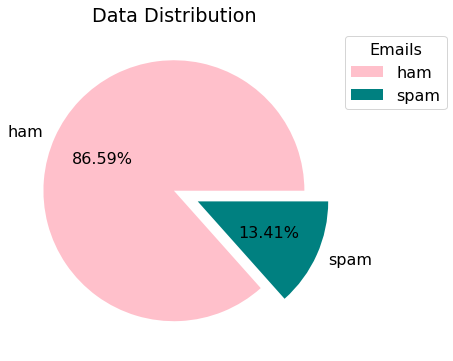

In [7]:
per = round(emails.label.value_counts() / emails.shape[0] * 100, 2)
plt.figure(figsize=(8,6))
plt.rcParams.update({'font.size': 16})
plt.pie(per, labels=['ham', 'spam'], autopct='%.2f%%', colors=['pink','teal'], explode=(0,0.2))
plt.legend(bbox_to_anchor=(1,1), title='Emails')
plt.title('Data Distribution')
plt.show()

### Converting the dataset into textblob and in a list of text

In [8]:
tx_blob = []
text = []

for i in range(len(emails)):
    data = emails['messages'][i]
    tx_blob.append(TextBlob(str(data)))
    text.append(data)

print(tx_blob[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Tagging all the words

In [10]:
tag = []
for tx in tx_blob:
    blob = tx.tags
    tag.append(blob)

print(tag[0])

[('Go', 'NNP'), ('until', 'IN'), ('jurong', 'JJ'), ('point', 'NN'), ('crazy..', 'NN'), ('Available', 'JJ'), ('only', 'RB'), ('in', 'IN'), ('bugis', 'NN'), ('n', 'RB'), ('great', 'JJ'), ('world', 'NN'), ('la', 'NN'), ('e', 'FW'), ('buffet', 'NN'), ('Cine', 'NNP'), ('there', 'EX'), ('got', 'VBD'), ('amore', 'RB'), ('wat', 'NN')]


### Forming sentences of emails

In [11]:
sentence = []
for tx in tx_blob:
    blob = tx.sentences
    sentence.append(blob)

print(sentence[0])

[Sentence("Go until jurong point, crazy.."), Sentence("Available only in bugis n great world la e buffet... Cine there got amore wat...")]


### Wordlist of sentence

In [12]:
print(sentence[0][0].words)

['Go', 'until', 'jurong', 'point', 'crazy']


### Correcting the sentence 

In [13]:
print(sentence[0][1].correct())

Available only in boris n great world la e buffets... Line there got more wat...


### Detecting the language of the sentence

In [14]:
print(sentence[0][1].detect_language())

en


### Finding the sentiment of the emails using polarity and subjectivity

In [15]:
polar = []
subj = []

for i in tx_blob:
    polar.append(i.sentiment.polarity)
    subj.append(i.sentiment.subjectivity)

df = pd.DataFrame({'polarity':polar, 'subjectivity':subj})
df.head()

,polarity,subjectivity
0,0.15,0.7625
1,0.50,0.5000
2,0.30,0.5500
3,0.10,0.3000
4,0.00,0.0000


### Ploting a line graph of polarity and subjectivity

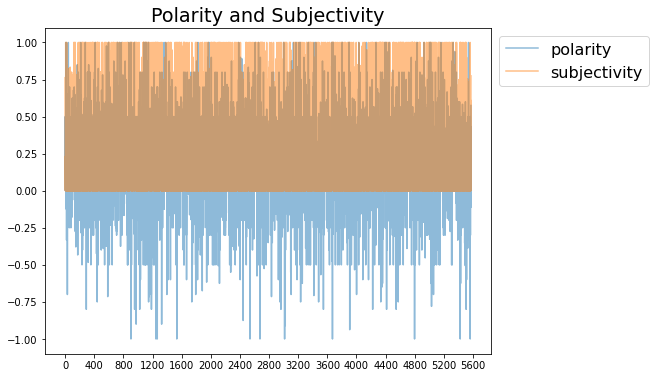

In [16]:
df.plot(title='Polarity and Subjectivity', figsize=(8,6), xticks=np.arange(0,5800,400), alpha=0.5, fontsize=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Ploting a density curve of polarity and subjectivity

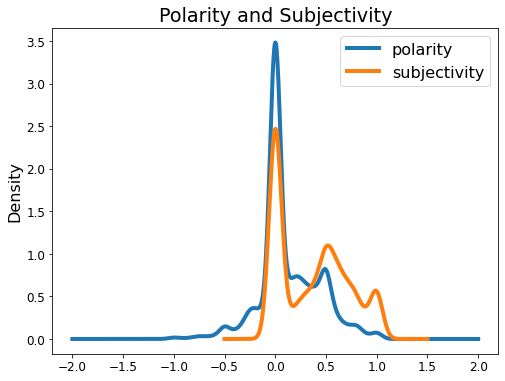

In [17]:
df.plot.density(title='Polarity and Subjectivity', figsize=(8,6), linewidth=4, fontsize=12)
plt.show()

### Ploting a histogram of polarity and subjectivity

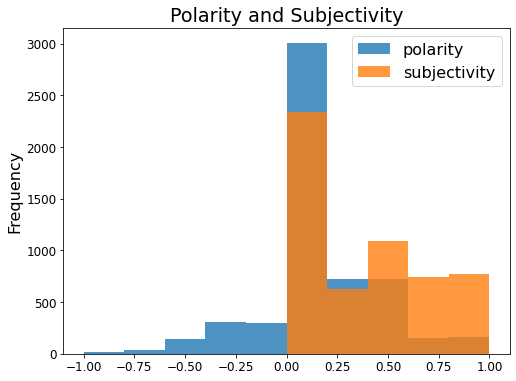

In [18]:
df.plot.hist(title='Polarity and Subjectivity', alpha = 0.8, figsize=(8,6), fontsize=12)
plt.show()

### Ploting a box plot of polarity

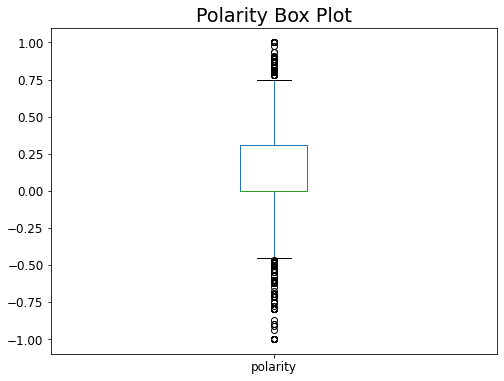

In [19]:
df['polarity'].plot.box(title='Polarity Box Plot', figsize=(8,6), fontsize=12)
plt.show()

### Ploting a box plot of subjectivity

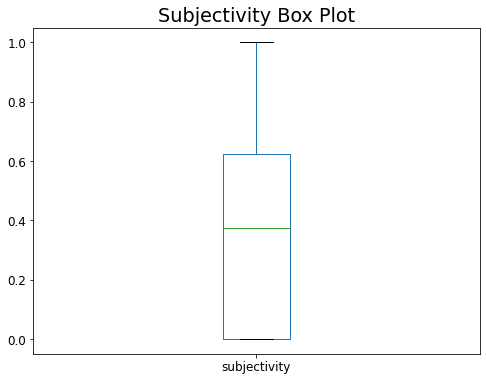

In [20]:
df['subjectivity'].plot.box(title='Subjectivity Box Plot', figsize=(8,6), fontsize=12)
plt.show()

### Using stop words from nltk corpus

In [0]:
stop = stopwords.words('english')
stop.append("I'm")
stop.append("gt")
stop.append("ur")
stop.append("lt")

### Converting the list to a string and then creating a WordCloud

In [0]:
listToStr = ' '.join([str(elem) for elem in text]) 

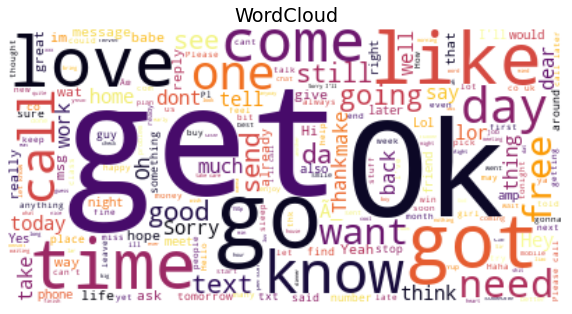

In [23]:
wordcloud = WordCloud(stopwords=stop, max_words=500, colormap='inferno',random_state=7, background_color='white').generate(listToStr)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud')
plt.show()

### Creating a dataframe for spam emails

In [24]:
spam_data = pd.DataFrame(list(emails.groupby(['label']))[1][1])
spam_data.reset_index(inplace=True, drop=True)
spam_data.head()

,label,messages
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,spam,FreeMsg Hey there darling it's been 3 week's n...
2,spam,WINNER!! As a valued network customer you have...
3,spam,Had your mobile 11 months or more? U R entitle...
4,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


### Creating a list of all the emails categorized as spam emails 

In [25]:
spam_text = []
for i in range(len(spam_data)):
    data = spam_data['messages'][i]
    spam_text.append(data)
print(spam_text[0])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


### Converting the list to a string and then creating a WordCloud for spam emails

In [0]:
spamToStr = ' '.join([str(elem) for elem in spam_text]) 

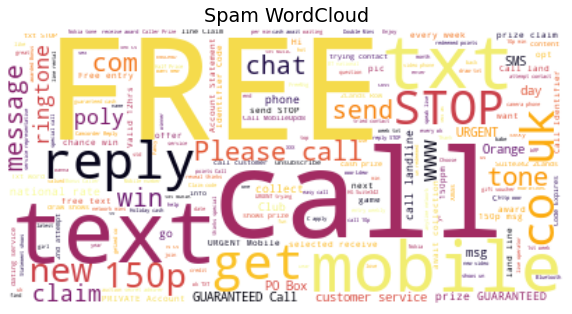

In [27]:
wordcloud = WordCloud(stopwords=stop, max_words=500, colormap='inferno',random_state=7, background_color='white').generate(spamToStr)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam WordCloud')
plt.show()

### Creating a dataframe for ham emails

In [28]:
ham_data = pd.DataFrame(list(emails.groupby(['label']))[0][1])
ham_data.reset_index(inplace=True, drop=True)
ham_data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,ham,Even my brother is not like to speak with me. ...


### Creating a list of all the emails categorized as ham emails 

In [29]:
ham_text = []
for i in range(len(ham_data)):
    data = ham_data['messages'][i]
    ham_text.append(data)
print(ham_text[0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


### Converting the list to a string and then creating a WordCloud for ham emails

In [0]:
hamToStr = ' '.join([str(elem) for elem in ham_text]) 

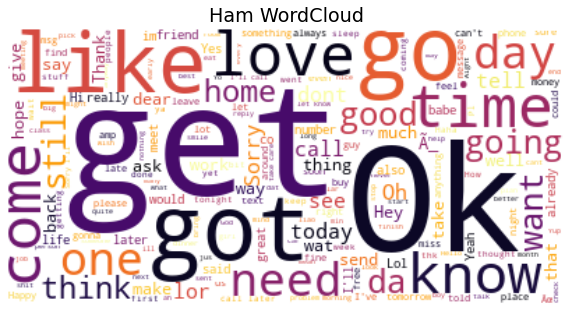

In [31]:
wordcloud = WordCloud(stopwords=stop, max_words=500, colormap='inferno',random_state=7, background_color='white').generate(hamToStr)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham WordCloud')
plt.show()

### Converting the target data set to binary dataset 

In [32]:
emails['numeric_label'] = emails.label.map({'ham':0,'spam':1})
emails.head()

,label,messages,numeric_label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [33]:
emails.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [0]:
ham_emails = emails[emails.label=='ham']
spam_emails = emails[emails.label=='spam']

### Over-Sampling the data to deal with data inconsistency

In [0]:
spam_emails_over = spam_emails.sample(ham_emails.shape[0], replace=True)

In [37]:
emails = pd.concat([spam_emails_over, ham_emails], axis=0)
print('Over-Sampling')
emails.label.value_counts()

Over-Sampling


spam    4825
ham     4825
Name: label, dtype: int64

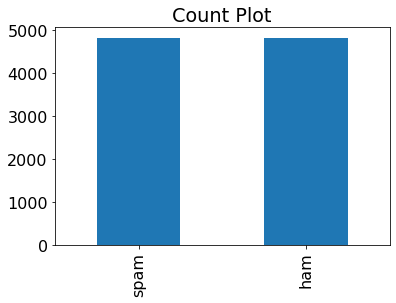

In [38]:
emails.label.value_counts().plot(kind='bar', title='Count Plot')
plt.show()

### Filtering the data set using regex and nltk corpus

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
emails = emails.reset_index(drop=True)

In [41]:
word_list = []
lemmatizer = WordNetLemmatizer()

for i in range(len(emails)):
    text = re.sub('[^a-zA-Z]', ' ', str(emails['messages'][i]))
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = ' '.join(text)
    word_list.append(text)

word_list[0]

'urgent call landline complimentary tenerife holiday cash await collection sae c box hp yf ppm'

### Adding a new column of filtered set of words in the data

In [42]:
emails['new_messages'] = word_list
emails.head()

,label,messages,numeric_label,new_messages
0,spam,Urgent! call 09061749602 from Landline. Your c...,1,urgent call landline complimentary tenerife ho...
1,spam,You are being contacted by our dating service ...,1,contacted dating service someone know find cal...
2,spam,You have WON a guaranteed Â£1000 cash or a Â£2...,1,guaranteed cash prize claim yr prize call cust...
3,spam,FreeMsg>FAV XMAS TONES!Reply REAL,1,freemsg fav xmas tone reply real
4,spam,Want to funk up ur fone with a weekly new tone...,1,want funk ur fone weekly new tone reply tone u...


###  Assigning values to X and y variable

In [43]:
X = emails['new_messages']
y = emails['numeric_label']
print(X.shape)
print(y.shape)

(9650,)
(9650,)


### Splitting data into train and test set

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.40)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5790,)
(3860,)
(5790,)
(3860,)


### Making instance of TF-IDF vectorizer

In [0]:
vectorizer = TfidfVectorizer()

### Fitting and transforming the train set using TfidfVectorizer instance

In [78]:
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect

<5790x5575 sparse matrix of type '<class 'numpy.float64'>'
	with 60631 stored elements in Compressed Sparse Row format>

### Transforming the test set using TfidfVectorizer instance on train set vector

In [79]:
X_test_vect = vectorizer.transform(X_test)
X_test_vect

<3860x5575 sparse matrix of type '<class 'numpy.float64'>'
	with 38500 stored elements in Compressed Sparse Row format>

### Creating a function to calculate the accuracy, precision, recall, f1 score and cohen's kappa score of the algorithms and save them in pandas dataframe

In [0]:
def dataFrame(name, y_true, y_pred):
    df = pd.DataFrame({'Algorithm':[name],
                       'Accuracy':[round(accuracy_score(y_true, y_pred),5)],
                       'Precision':[round(precision_score(y_true, y_pred),5)],
                       'Recall':[round(recall_score(y_true, y_pred),5)],
                       'F1 Score':[round(f1_score(y_true, y_pred),5)],
                       "Cohen's Kappa":[round(cohen_kappa_score(y_true, y_pred),5)]})
    return df

## Machine Learning Algorithms

### 1. Naive Bayes using GridSearchCV to tune hyperparameters

In [81]:
from sklearn.naive_bayes import MultinomialNB

tuned_parameters = [{'alpha':(0.001, 0.01, 0.1, 1)}]
    
naive_bayes = GridSearchCV(estimator=MultinomialNB(),
                           param_grid=tuned_parameters,
                           cv=10)
    
naive_bayes.fit(X_train_vect, y_train)

    
means = naive_bayes.cv_results_['mean_test_score']
stds = naive_bayes.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, naive_bayes.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',naive_bayes.best_params_)
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(naive_bayes.best_score_))
print('\nBest Index:',naive_bayes.best_index_,'\n')
    
y_true, y_pred = y_test, naive_bayes.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.980 +/- (0.011) for {'alpha': 0.001}
0.980 +/- (0.011) for {'alpha': 0.01}
0.979 +/- (0.011) for {'alpha': 0.1}
0.968 +/- (0.012) for {'alpha': 1}

Best Parameters:  

 {'alpha': 0.01}

Best Score: 0.980 

Best Index: 1 

Confusion matrix

 [[1901   59]
 [   7 1893]] 

		 ** Detailed classification report ** 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1960
           1       0.97      1.00      0.98      1900

    accuracy                           0.98      3860
   macro avg       0.98      0.98      0.98      3860
weighted avg       0.98      0.98      0.98      3860



In [82]:
df = dataFrame('naive bayes', y_true, y_pred)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.9829,0.96977,0.99632,0.98287,0.96581


### 2. Logistic Regression using GridSearchCV to tune hyperparameters

In [83]:
from sklearn.linear_model import LogisticRegression

tuned_parameters = {'tol':[0.0001, 0.001, 0.01],
                    'C':[2,3,4],
                    'max_iter':[5,10,15]}

linear_model = GridSearchCV(estimator=LogisticRegression(random_state=4, n_jobs=-1), 
                            param_grid=tuned_parameters,
                            cv=5)

linear_model.fit(X_train_vect, y_train)
    

    
means = linear_model.cv_results_['mean_test_score']
stds = linear_model.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, linear_model.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',linear_model.best_params_)        
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(linear_model.best_score_))
print('\nBest Index:',linear_model.best_index_,'\n')
    
y_true, y_pred = y_test, linear_model.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.943 +/- (0.006) for {'C': 2, 'max_iter': 5, 'tol': 0.0001}
0.943 +/- (0.006) for {'C': 2, 'max_iter': 5, 'tol': 0.001}
0.943 +/- (0.006) for {'C': 2, 'max_iter': 5, 'tol': 0.01}
0.971 +/- (0.004) for {'C': 2, 'max_iter': 10, 'tol': 0.0001}
0.971 +/- (0.004) for {'C': 2, 'max_iter': 10, 'tol': 0.001}
0.971 +/- (0.004) for {'C': 2, 'max_iter': 10, 'tol': 0.01}
0.983 +/- (0.002) for {'C': 2, 'max_iter': 15, 'tol': 0.0001}
0.983 +/- (0.002) for {'C': 2, 'max_iter': 15, 'tol': 0.001}
0.983 +/- (0.002) for {'C': 2, 'max_iter': 15, 'tol': 0.01}
0.943 +/- (0.006) for {'C': 3, 'max_iter': 5, 'tol': 0.0001}
0.943 +/- (0.006) for {'C': 3, 'max_iter': 5, 'tol': 0.001}
0.943 +/- (0.006) for {'C': 3, 'max_iter': 5, 'tol': 0.01}
0.972 +/- (0.003) for {'C': 3, 'max_iter': 10, 'tol': 0.0001}
0.972 +/- (0.003) for {'C': 3, 'max_iter': 10, 'tol': 0.001}
0.972 +/- (0.003) for {'C': 3, 'max_iter': 10, 'tol': 0.01}
0.982 +/- (0.003) for {'C': 3, 'max_iter': 15, 'tol': 0.0001}
0.982

In [84]:
df = df.append(dataFrame('logistic regression', y_true, y_pred), ignore_index=True)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409


### 3. Support Vector Machines using GridSearchCV to tune hyperparameters

In [85]:
from sklearn.svm import SVC

tuned_parameters = {'C':[2,3,4],
                    'degree':[1,2],
                    'kernel':['rbf','sigmoid','poly']}

svm = GridSearchCV(estimator=SVC(random_state=4), 
                   param_grid=tuned_parameters,
                   cv=5)

svm.fit(X_train_vect, y_train)
    
means = svm.cv_results_['mean_test_score']
stds = svm.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, svm.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',svm.best_params_)        
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(svm.best_score_))
print('\nBest Index:',svm.best_index_,'\n')
    
y_true, y_pred = y_test, svm.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.994 +/- (0.004) for {'C': 2, 'degree': 1, 'kernel': 'rbf'}
0.987 +/- (0.005) for {'C': 2, 'degree': 1, 'kernel': 'sigmoid'}
0.993 +/- (0.002) for {'C': 2, 'degree': 1, 'kernel': 'poly'}
0.994 +/- (0.004) for {'C': 2, 'degree': 2, 'kernel': 'rbf'}
0.987 +/- (0.005) for {'C': 2, 'degree': 2, 'kernel': 'sigmoid'}
0.992 +/- (0.008) for {'C': 2, 'degree': 2, 'kernel': 'poly'}
0.994 +/- (0.004) for {'C': 3, 'degree': 1, 'kernel': 'rbf'}
0.983 +/- (0.006) for {'C': 3, 'degree': 1, 'kernel': 'sigmoid'}
0.993 +/- (0.003) for {'C': 3, 'degree': 1, 'kernel': 'poly'}
0.994 +/- (0.004) for {'C': 3, 'degree': 2, 'kernel': 'rbf'}
0.983 +/- (0.006) for {'C': 3, 'degree': 2, 'kernel': 'sigmoid'}
0.992 +/- (0.008) for {'C': 3, 'degree': 2, 'kernel': 'poly'}
0.994 +/- (0.004) for {'C': 4, 'degree': 1, 'kernel': 'rbf'}
0.982 +/- (0.006) for {'C': 4, 'degree': 1, 'kernel': 'sigmoid'}
0.992 +/- (0.004) for {'C': 4, 'degree': 1, 'kernel': 'poly'}
0.994 +/- (0.004) for {'C': 4, 'degr

In [86]:
df = df.append(dataFrame('support vector machines', y_true, y_pred), ignore_index=True)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409
2,support vector machines,0.99819,0.99633,1.00000,0.99816,0.99637


### 4. Neural Networks using GridSearchCV to tune hyperparameters

In [87]:
from sklearn.neural_network import MLPClassifier

tuned_parameters = {'activation':['relu','logistic','tanh']}

neural_networks = GridSearchCV(estimator=MLPClassifier(random_state=4), 
                               param_grid=tuned_parameters, 
                               cv=5)

neural_networks.fit(X_train_vect, y_train)
    
means = neural_networks.cv_results_['mean_test_score']
stds = neural_networks.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, neural_networks.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',neural_networks.best_params_)
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(neural_networks.best_score_))
print('\nBest Index:',neural_networks.best_index_,'\n')
    
y_true, y_pred = y_test, neural_networks.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.992 +/- (0.003) for {'activation': 'relu'}
0.994 +/- (0.001) for {'activation': 'logistic'}
0.993 +/- (0.003) for {'activation': 'tanh'}

Best Parameters:  

 {'activation': 'logistic'}

Best Score: 0.994 

Best Index: 1 

Confusion matrix

 [[1946   14]
 [   1 1899]] 

		 ** Detailed classification report ** 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1960
           1       0.99      1.00      1.00      1900

    accuracy                           1.00      3860
   macro avg       1.00      1.00      1.00      3860
weighted avg       1.00      1.00      1.00      3860



In [88]:
df = df.append(dataFrame('neural networks', y_true, y_pred), ignore_index=True)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409
2,support vector machines,0.99819,0.99633,1.00000,0.99816,0.99637
3,neural networks,0.99611,0.99268,0.99947,0.99607,0.99223


### 5. Random Forest using GridSearchCV to tune hyperparameters

In [89]:
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = {'criterion':['gini','entropy'],
                    'n_estimators':[20,50,80,100]}

random_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=6), 
                             param_grid=tuned_parameters, 
                             cv=5)

random_forest.fit(X_train_vect, y_train)
    
means = random_forest.cv_results_['mean_test_score']
stds = random_forest.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, random_forest.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',random_forest.best_params_)
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(random_forest.best_score_))
print('\nBest Index:',random_forest.best_index_,'\n')
    
y_true, y_pred = y_test, random_forest.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.994 +/- (0.002) for {'criterion': 'gini', 'n_estimators': 20}
0.996 +/- (0.000) for {'criterion': 'gini', 'n_estimators': 50}
0.995 +/- (0.001) for {'criterion': 'gini', 'n_estimators': 80}
0.995 +/- (0.001) for {'criterion': 'gini', 'n_estimators': 100}
0.996 +/- (0.001) for {'criterion': 'entropy', 'n_estimators': 20}
0.995 +/- (0.001) for {'criterion': 'entropy', 'n_estimators': 50}
0.996 +/- (0.003) for {'criterion': 'entropy', 'n_estimators': 80}
0.996 +/- (0.002) for {'criterion': 'entropy', 'n_estimators': 100}

Best Parameters:  

 {'criterion': 'entropy', 'n_estimators': 100}

Best Score: 0.996 

Best Index: 7 

Confusion matrix

 [[1956    4]
 [   0 1900]] 

		 ** Detailed classification report ** 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1960
           1       1.00      1.00      1.00      1900

    accuracy                           1.00      3860
   macro avg       1.00      1.00   

In [90]:
df = df.append(dataFrame('random forest', y_true, y_pred), ignore_index=True)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409
2,support vector machines,0.99819,0.99633,1.00000,0.99816,0.99637
3,neural networks,0.99611,0.99268,0.99947,0.99607,0.99223
4,random forest,0.99896,0.99790,1.00000,0.99895,0.99793


### 6. K Nearest Neighbor using GridSearchCV to tune hyperparameters

In [91]:
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'n_neighbors':[1,2],
                    'weights':['uniform','distance']}

knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5)

knn.fit(X_train_vect, y_train)
    
means = knn.cv_results_['mean_test_score']
stds = knn.cv_results_['std_test_score']
    
print('Grid scores on the set\n')
    
for mean, std, params in zip(means, stds, knn.cv_results_['params']):
    print("%0.3f +/- (%0.03f) for %r" %(mean, std * 1.96, params))
        
print('\n\033[1m' + 'Best Parameters: \033[0m \n\n',knn.best_params_)
print('\033[1m' + '\nBest Score: %0.3f \033[0m' %(knn.best_score_))
print('\nBest Index:',knn.best_index_,'\n')
    
y_true, y_pred = y_test, knn.predict(X_test_vect)
    
print('\033[1m' + 'Confusion matrix\n\n' + '\033[0m',confusion_matrix(y_true,y_pred),'\n')
print('\033[1m' + '\t\t ** Detailed classification report ** '+'\033[0m\n\n',classification_report(y_true, y_pred))

Grid scores on the set

0.990 +/- (0.007) for {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}
0.990 +/- (0.007) for {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'distance'}
0.966 +/- (0.013) for {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
0.990 +/- (0.007) for {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}
0.990 +/- (0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.990 +/- (0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'distance'}
0.966 +/- (0.013) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'uniform'}
0.990 +/- (0.007) for {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'distance'}
0.990 +/- (0.007) for {'algorithm': 'kd_tree', 'n_neighbors': 1, 'weights': 'uniform'}
0.990 +/- (0.007) for {'algorithm': 'kd_tree', 'n_neighbors': 1, 'weights': 'distance'}
0.966 +/- (0.013) for {'algorithm': 'kd_tree', 'n_neighbors': 2, 'weights': 'uniform'}
0.990 +/- (0.007) 

In [92]:
df = df.append(dataFrame('k nearest neighbor', y_true, y_pred), ignore_index=True)
df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409
2,support vector machines,0.99819,0.99633,1.00000,0.99816,0.99637
3,neural networks,0.99611,0.99268,0.99947,0.99607,0.99223
4,random forest,0.99896,0.99790,1.00000,0.99895,0.99793
5,k nearest neighbor,0.99767,0.99894,0.99632,0.99763,0.99534


## Model comparision based on accuracy, precision, recall, f1-score and cohen's kappa score

In [93]:
df.sort_values(by="Cohen's Kappa", ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa
4,random forest,0.99896,0.99790,1.00000,0.99895,0.99793
2,support vector machines,0.99819,0.99633,1.00000,0.99816,0.99637
5,k nearest neighbor,0.99767,0.99894,0.99632,0.99763,0.99534
3,neural networks,0.99611,0.99268,0.99947,0.99607,0.99223
1,logistic regression,0.98705,0.98890,0.98474,0.98681,0.97409
0,naive bayes,0.98290,0.96977,0.99632,0.98287,0.96581


# Conclusion

## ***Based on F1 score and cohen's kappa score, we can see that Random Forest is the best algorithm for our dataset with the accuracy of 99.89% ***

# References
- Kaggle
- Wikipedia
- towardsdatascience.com
- scikit-learn.org
- GitHub